# 实验四：使用决策树与随机森林进行鸢尾花数据集分类 

## 实验介绍
决策树是一类树形的分类算法，它符合人类的认知思维习惯，具有优良的可解释性。而且分类效果一般较好。
随机森林算法是一种在决策树的基础上发展而来的算法，该算法的性能十分优良，采用投票机制，非常
有效的解决了决策树分类中出现的过拟合问题。
在本实验中，我们可视化了一颗分类树，然后利用sklearn实现了随机森林算法，并对算法性能进行了评估。

## 0.导入需要的工具库

In [426]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_iris


## 1.加载数据

In [427]:
# sklearn的数据集中自带鸢尾花数据集
iris = load_iris()

In [428]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [429]:
iris_feature_name = iris.feature_names #数据集中的列名
iris_features = iris.data #数据集中的特征数据
iris_target_name = iris.target_names #数据集中的标签名字
iris_target = iris.target #数据集中的标签数据

In [430]:
# 看一下特征名称
iris_feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [431]:
# 特征数据
iris_features[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [432]:
# 标签名称
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [433]:
# 标签数据
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [434]:
# 共有150条数据
iris_features.shape

(150, 4)

## 构建决策树模型

In [435]:
# 构建一个决策树模型，树深设置为4
clf = tree.DecisionTreeClassifier(max_depth=4,random_state= 0)
clf = clf.fit(iris_features, iris_target)

In [436]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## 可视化树模型

In [437]:
import pydotplus
from IPython.display import Image, display

In [438]:
dot_data = tree.export_graphviz(clf,
                                out_file = None,
                                feature_names = iris_feature_name,
                                class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )

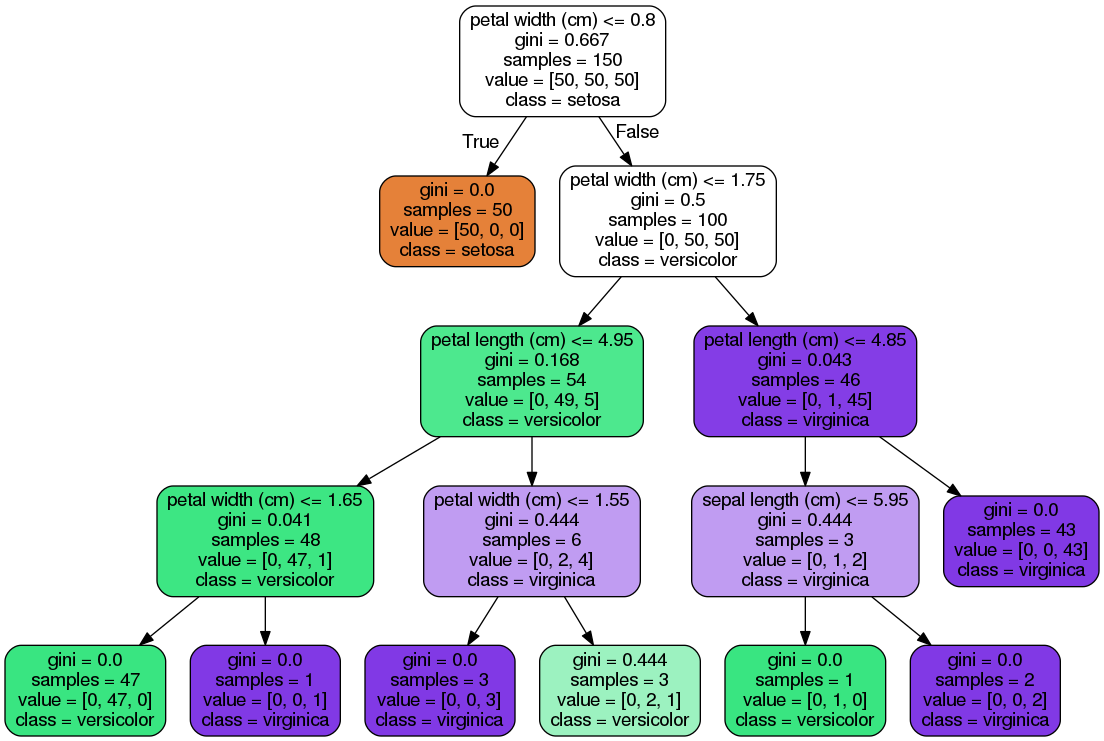

In [439]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

从以上的树中可以看到决策树每次的分裂过程，这样可以对树模型进行解释。因此我们知道树模型具有良好的可解释性。

## 使用随机森林进行预测

随机森林模型是在决策树的基础上进行集成得到的一种集成模型，它是一个包含多个决策树的分类器，并且其输出的类别是由个别树输出的类别的众数而定。这种模型的随机性体现在两个方面。一是每棵树的训练样本是随机的，二是每棵树中用于划分的特征也是随机的。有了这两个随机性，随机森林模型的过拟合现象会大大降低。

In [440]:
# 进行训练集与测试集的切分，测试集的占比为30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_features,iris_target,test_size = 0.3,random_state = 0)

In [441]:
from sklearn.ensemble import RandomForestClassifier

In [442]:
# 我们设置了5棵分类树，设置最大树深为4
forest = RandomForestClassifier(n_estimators= 5,max_depth= 4,random_state = 0)

In [443]:
# 拟合训练数据
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [444]:
# 进行预测
y_pred = forest.predict(X_test)

In [445]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [446]:
# 预测的准确度
sum(y_pred == y_test) / len(y_test)

0.9555555555555556

可以看到，预测的准确度达到了95.56%，说明模型的预测效果是很好的。

## 作业

1.思考树模型与线性模型的区别，在此基础上思考决策树分类和逻辑回归分类的区别。

```Bash
###输入你的作业答案###


In [447]:
## ----------------------------------树模型--------------------------------------
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [448]:
iris_feature_name = iris.feature_names #数据集中的列名
iris_features = iris.data #数据集中的特征数据
iris_target_name = iris.target_names #数据集中的标签名字
iris_target = iris.target #数据集中的标签数据

In [449]:
dTClf = tree.DecisionTreeClassifier(max_depth=4,random_state= 0)
dTClf = dTClf.fit(X_train,y_train)

In [450]:
y_pred = dTClf.predict(X_test)

In [451]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [452]:
# 预测的准确度
print("树模型预测的准确度为: ", sum(y_pred == y_test) / len(y_test))

树模型预测的准确度为:  0.9777777777777777


In [453]:
## ----------------------------------线性模型--------------------------------------
from sklearn.linear_model import LogisticRegression


In [454]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [455]:
y_lin_pred = lin_reg.predict(X_test)

In [456]:
y_lin_pred

array([ 2.0800217 ,  0.96538248, -0.16059841,  1.82145864, -0.03279814,
        2.29285464, -0.0343939 ,  1.30521478,  1.26561416,  1.10541716,
        1.61159498,  1.298586  ,  1.24465733,  1.31690327,  1.35492326,
       -0.10346345,  1.37219354,  1.26672646,  0.03680825, -0.05379679,
        1.83399503,  1.43837459,  0.11282152,  0.05064127,  1.59191577,
       -0.10797474,  0.16648933,  1.17025174,  0.9383186 ,  0.10722461,
        1.74762851,  1.47239343, -0.0686736 ,  1.63311215,  2.00534368,
        1.28851961, -0.04742887,  1.59936929,  1.30364572,  1.10409738,
        1.84963128, -0.03385706,  1.83128696,  0.21749054, -0.10640568])

In [457]:
# 预测的准确度
print("线性模型预测的准确度为: ", sum(y_lin_pred == y_test) / len(y_test))

线性模型预测的准确度为:  0.0


In [458]:
import numpy as np
from sklearn.metrics import mean_squared_error

## ----------------------------------线性模型--------------------------------------
lin_mse = mean_squared_error(y_test, y_lin_pred)
lin_rmse = np.sqrt(lin_mse)
print("线性模型的MSE: ", lin_rmse)

线性模型的MSE:  0.24262650146330914


In [459]:
## ----------------------------------树模型----------------------------------------
clf_mse = mean_squared_error(y_test, y_pred)
clf_rmse = np.sqrt(clf_mse)
print("树模型的MSE: ", clf_rmse)

树模型的MSE:  0.14907119849998599


（一）树模型

  1.树模型产生可视化的分类规则，便于借助图表表达简单直观，逐个特征进行处理，更加接近人的决策方式；
  2.产生的模型可以抽取规则易于理解，即解释性比线性模型强；
  3.树模型拟合出的函数其实是分区间的阶梯函数；
  4.在训练过程中，树模型需要计算特征属性的信息增益或信息增益率等度量，从而确定哪个属性对目标最有益，即有最强区分样本的能力；
  5.一般特征空间复杂（比如以上鸢尾花分类问题）无法用线性表达时，可使用树模型解决问题。

 
（二）线性模型

  6.线性模型是对所有特征赋予权重后相加得到一个新的值；
  7.通常能够获得更高的预测精度，预测均方差比树模型低；
  8.线性模型拟合出来的函数则可以是任意曲线；
  9.在训练过程中，线性模型使用简单公式通过一组数据点找到最佳拟合；
  10.当特征与标签可以通过线性方式得到较好拟合时，则可使用线性模型解决问题。

###作业答案结束###
```